# **INTRODUCTION** :





The Wine dataset contains chemical analysis measurements on 178 wines derived from three different cultivars grown in the same region of Italy.

Flavonols and their glycosides play a significant role in wine, influencing its color, flavor, and health benefits [1]. The key components in wine structure, which require balance, include fruitiness, sugar content, alcohol level, acidity, and tannins. These elements not only affect the color and taste of wine but also contribute to its overall structure. Among them, acidity and tannins stand out as the most critical factors in shaping the wine's structure[2].




# **The Data**

There is one file in the data: (1) wine.csv:                           The wine.csv file contains chemical analysis data for different wine samples. It has 178 rows, where each row represents a single wine sample. For each wine sample, there are 14 columns or features that describe various chemical properties of the wine INCLUDING : The class/type of wine, Alcohol content, etc.

Several research papers reference this dataset, employing it in studies related to pattern recognition and clustering. It seems to be a widely recognized dataset suitable for evaluating new classifiers, given its clearly defined classification task and straightforward class arrangements[3].



# **The Goal**

While the chemical analyses of wines are derived from grapes grown in the same region in Italy, they originate from three different cultivars.
Our goal is to analyze which of the thirteen chemical constituents most distinctly differentiates these three classes of wine from each other. This entails identifying the most significant chemical constituent that sets apart the wines from the three cultivars!

# 1. **Importing packages**

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression



# 2. **Load in some data and display the dataFrame**

In [207]:
title_name= ['Class','Target', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
             'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine_data= pd.read_csv("/content/wine.csv", names = title_name)
wine_data

,Class,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,NaN
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,NaN
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,NaN
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,NaN
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,NaN
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,NaN
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,NaN
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,NaN



#**Exploratory Data Analysis**    

Descriptive Statistics
to gain an initial understanding of the data, let's calculate some descriptive statistics such as mean, median, mode, standard deviation, and variance:

In [208]:
wine_data.describe()

,Class,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,0.0
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,NaN
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,NaN
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,NaN
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,NaN
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,NaN
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,NaN
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,NaN


**DESCRIPTIVE STATS BASED ON THE CLASS:**

analyze the descriptive statistics separately for each class of wine to identify any potential differences or patterns


In [209]:
class1_data = wine_data[wine_data['Class'] == 1]
class1_data.describe()


,Class,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,0.0
mean,1.0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,NaN
std,0.0,0.462125,0.688549,0.227166,2.546322,10.498949,0.338961,0.397494,0.070049,0.412109,1.238573,0.116483,0.357077,221.520767,NaN
min,1.0,12.850000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,3.520000,0.820000,2.510000,680.000000,NaN
25%,1.0,13.400000,1.665000,2.295000,16.000000,98.000000,2.600000,2.680000,0.255000,1.640000,4.550000,0.995000,2.870000,987.500000,NaN
50%,1.0,13.750000,1.770000,2.440000,16.800000,104.000000,2.800000,2.980000,0.290000,1.870000,5.400000,1.070000,3.170000,1095.000000,NaN
75%,1.0,14.100000,1.935000,2.615000,18.700000,114.000000,3.000000,3.245000,0.320000,2.090000,6.225000,1.130000,3.420000,1280.000000,NaN
max,1.0,14.830000,4.040000,3.220000,25.000000,132.000000,3.880000,3.930000,0.500000,2.960000,8.900000,1.280000,4.000000,1680.000000,NaN


In [210]:
class2_data = wine_data[wine_data['Class'] == 2]
class2_data.describe()


,Class,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,71.0,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,0.0
mean,2.0,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,NaN
std,0.0,0.537964,1.015569,0.315467,3.349770,16.753497,0.545361,0.705701,0.123961,0.602068,0.924929,0.202937,0.496573,157.211220,NaN
min,2.0,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000,NaN
25%,2.0,11.915000,1.270000,2.000000,18.000000,85.500000,1.895000,1.605000,0.270000,1.350000,2.535000,0.925000,2.440000,406.500000,NaN
50%,2.0,12.290000,1.610000,2.240000,20.000000,88.000000,2.200000,2.030000,0.370000,1.610000,2.900000,1.040000,2.830000,495.000000,NaN
75%,2.0,12.515000,2.145000,2.420000,22.000000,99.500000,2.560000,2.475000,0.430000,1.885000,3.400000,1.205000,3.160000,625.000000,NaN
max,2.0,13.860000,5.800000,3.230000,30.000000,162.000000,3.520000,5.080000,0.660000,3.580000,6.000000,1.710000,3.690000,985.000000,NaN


In [211]:
class3_data = wine_data[wine_data['Class'] == 3]
class3_data.describe()

,Class,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000,0.0
mean,3.0,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.44750,1.153542,7.396250,0.682708,1.683542,629.895833,NaN
std,0.0,0.530241,1.087906,0.184690,2.258161,10.890473,0.356971,0.293504,0.12414,0.408836,2.310942,0.114441,0.272111,115.097043,NaN
min,3.0,12.200000,1.240000,2.100000,17.500000,80.000000,0.980000,0.340000,0.17000,0.550000,3.850000,0.480000,1.270000,415.000000,NaN
25%,3.0,12.805000,2.587500,2.300000,20.000000,89.750000,1.407500,0.580000,0.39750,0.855000,5.437500,0.587500,1.510000,545.000000,NaN
50%,3.0,13.165000,3.265000,2.380000,21.000000,97.000000,1.635000,0.685000,0.47000,1.105000,7.550000,0.665000,1.660000,627.500000,NaN
75%,3.0,13.505000,3.957500,2.602500,23.000000,106.000000,1.807500,0.920000,0.53000,1.350000,9.225000,0.752500,1.820000,695.000000,NaN
max,3.0,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.570000,0.63000,2.700000,13.000000,0.960000,2.470000,880.000000,NaN


In [212]:
print(wine_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Target                        178 non-null    float64
 2   Alcohol                       178 non-null    float64
 3   Malic acid                    178 non-null    float64
 4   Ash                           178 non-null    float64
 5   Alcalinity of ash             178 non-null    int64  
 6   Magnesium                     178 non-null    float64
 7   Total phenols                 178 non-null    float64
 8   Flavanoids                    178 non-null    float64
 9   Nonflavanoid phenols          178 non-null    float64
 10  Proanthocyanins               178 non-null    float64
 11  Color intensity               178 non-null    float64
 12  Hue                           178 non-null    float64
 13  OD280

# **Checking the Correlation with Class:**

The correlation analysis reveals how various chemical properties relate to the three cultivars in the dataset.

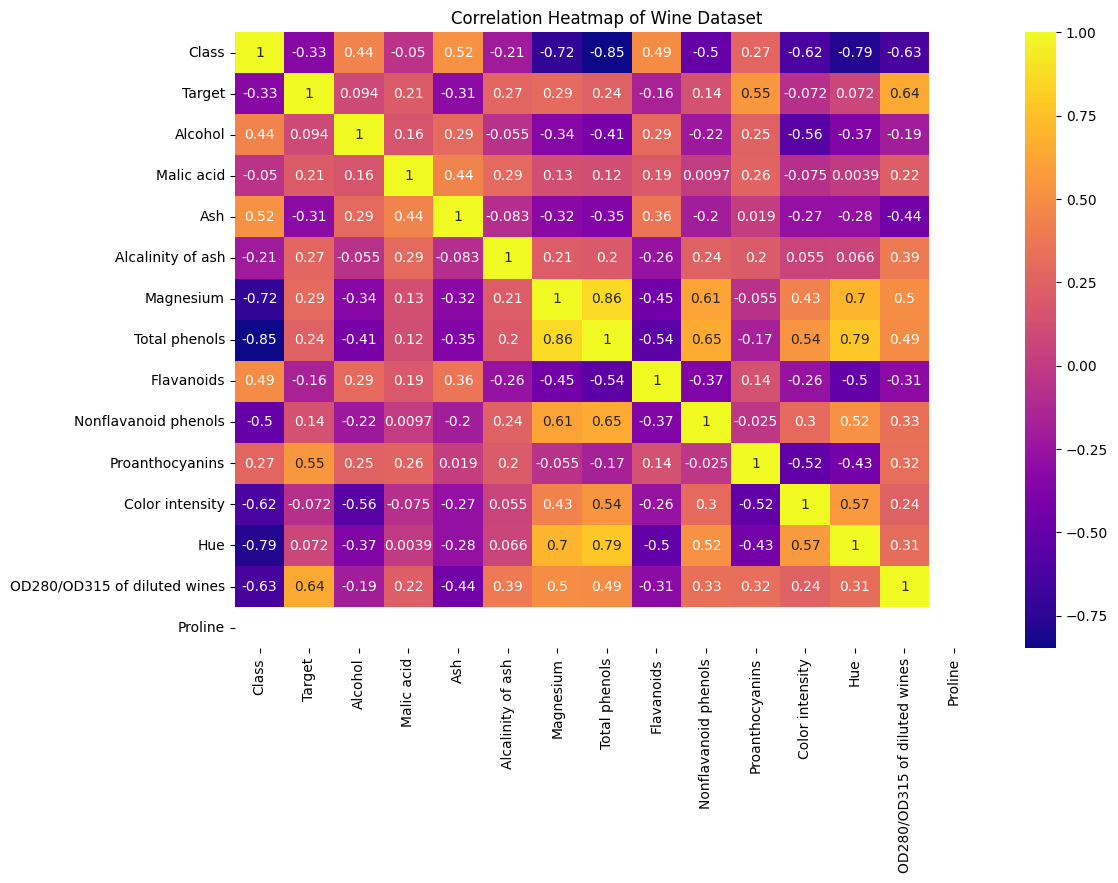

In [213]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='plasma')
plt.title("Correlation Heatmap of Wine Dataset")
plt.show()


In [214]:
print(wine_data.corr())

                                 Class    Target   Alcohol  Malic acid  \
Class                         1.000000 -0.328222  0.437776   -0.049643   
Target                       -0.328222  1.000000  0.094397    0.211545   
Alcohol                       0.437776  0.094397  1.000000    0.164045   
Malic acid                   -0.049643  0.211545  0.164045    1.000000   
Ash                           0.517859 -0.310235  0.288500    0.443367   
Alcalinity of ash            -0.209179  0.270798 -0.054575    0.286587   
Magnesium                    -0.719163  0.289101 -0.335167    0.128980   
Total phenols                -0.847498  0.236815 -0.411007    0.115077   
Flavanoids                    0.489109 -0.155929  0.292977    0.186230   
Nonflavanoid phenols         -0.499130  0.136698 -0.220746    0.009652   
Proanthocyanins               0.265668  0.546364  0.248985    0.258887   
Color intensity              -0.617369 -0.071747 -0.561296   -0.074667   
Hue                          -0.788230

*Regarding the "Class" variable, it displays noteworthy patterns. It shares strong negative correlations with total phenols, hue, OD280/OD315 of diluted wines, and magnesium, suggesting these features tend to diminish with shifts in wine class. Conversely, there are moderate positive correlations with alcohol and flavanoids, implying that wines across different classes generally boast higher levels of these components. These correlations underscore potential distinctions in wine properties among various classes but need futher analysis !*

#**Feature Distributions**

To better understand the distribution of each feature, we can plot histograms with kernel density estimates:

In [215]:
features = [ 'Target', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

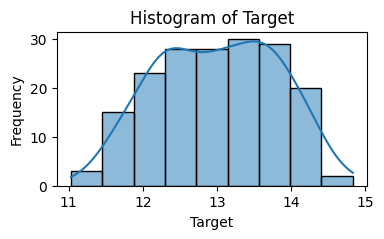

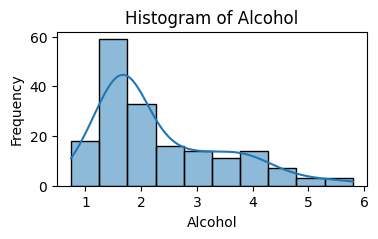

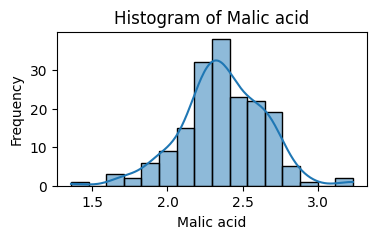

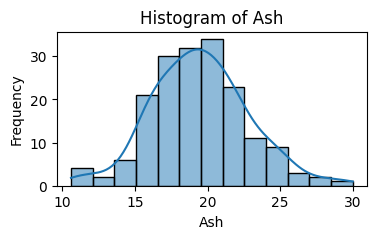

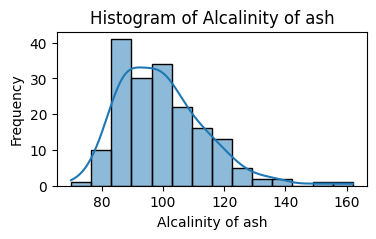

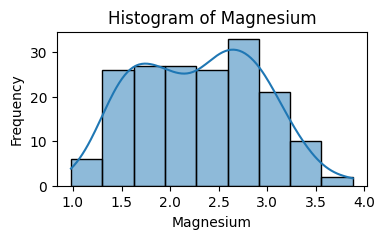

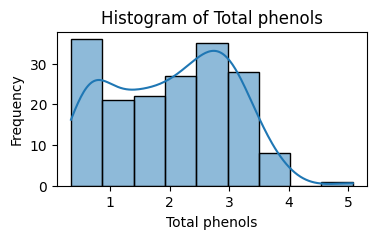

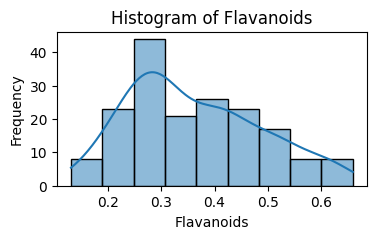

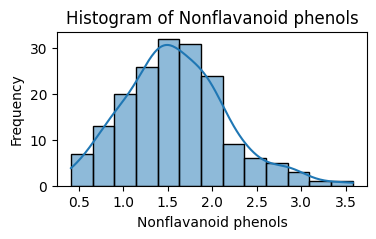

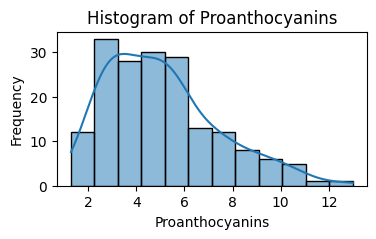

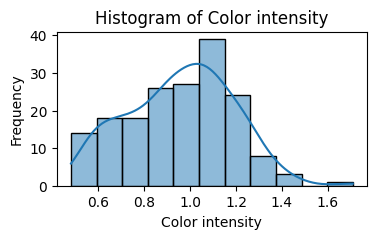

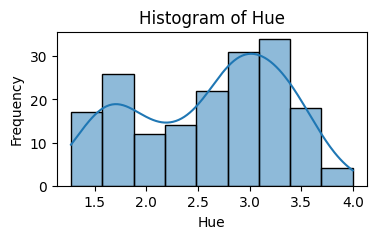

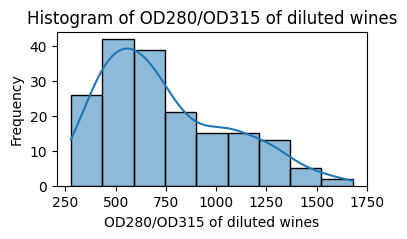

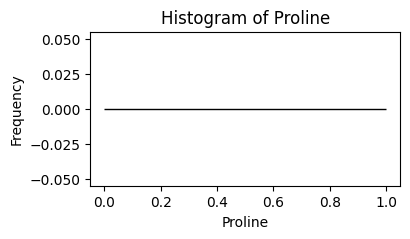

In [216]:
 for feature in features:
    plt.figure(figsize=(4, 2))
    sns.histplot(wine_data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

#**Class Distribution**

<ipython-input-217-425c03412a75>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=wine_data, palette='viridis')


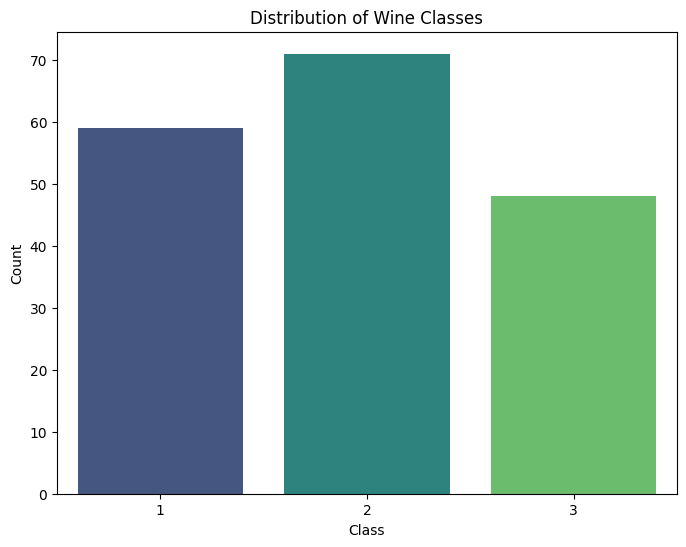

In [217]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=wine_data, palette='viridis')
plt.title('Distribution of Wine Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

It's helpful to visualize the distribution of the class variable to ensure that the classes are reasonably balanced. In this case, classes seem to be reasonably balanced. However, slight imbalance could also be considered.

#**Mean Composition Analysis**

To better understand the differences in the chemical compositions across the three classes we can visualize the mean compositions using pie charts:


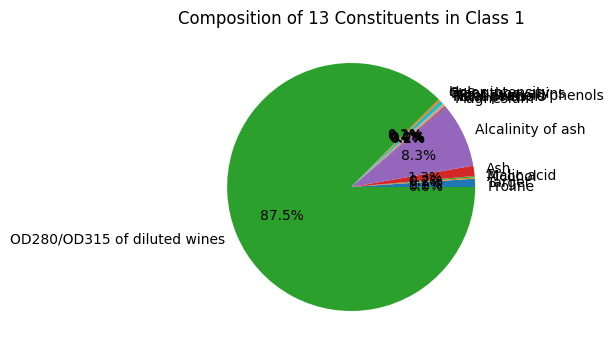

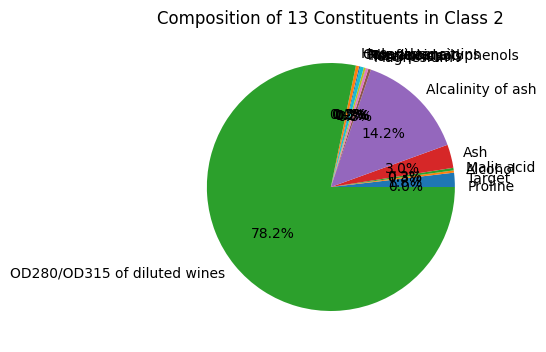

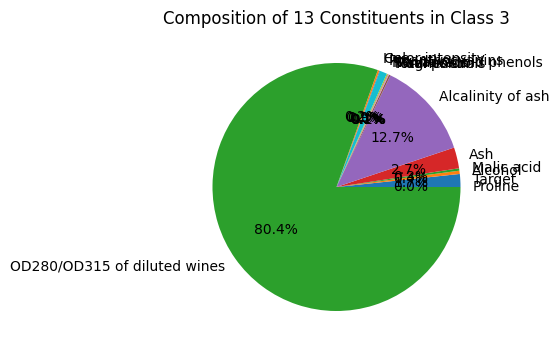

In [218]:
class1_data = wine_data[wine_data['Class'] == 1]
class1_constituents = class1_data.drop(columns=['Class'])
class2_constituents = class2_data.drop(columns=['Class'])
class3_constituents = class3_data.drop(columns=['Class'])



# Replace NaN values with zeros:
class1_constituents.fillna(0, inplace=True)
class2_constituents.fillna(0, inplace=True)
class3_constituents.fillna(0, inplace=True)


class1_mean = class1_constituents.mean()
class2_mean = class2_constituents.mean()
class3_mean = class3_constituents.mean()


plt.figure(figsize=(4, 5))
plt.pie(class1_mean, labels=class1_constituents.columns, autopct='%1.1f%%')
plt.title('Composition of 13 Constituents in Class 1')
plt.show()

plt.figure(figsize=(4, 5))
plt.title('Composition of 13 Constituents in Class 2')
plt.pie(class2_mean, labels=class2_constituents.columns, autopct='%1.1f%%')
plt.show()

plt.figure(figsize=(4, 5))
plt.pie(class3_mean, labels=class3_constituents.columns,autopct='%1.1f%%' )
plt.title('Composition of 13 Constituents in Class 3')
plt.show()




**Exploring Other Visualizations: Scatter Plots and Pair Plots**


In [219]:
# Scatter plot matrix
plt.figure(figsize=(12, 10))
scatter_matrix = pd.plotting.scatter_matrix(wine_data[['Alcohol', 'Malic acid', 'Total phenols', 'Flavanoids', 'Class']],
                                            c=wine_data['Class'], cmap='viridis', alpha=0.5, figsize=(12, 10))
plt.show()

# Pair plot
plt.figure(figsize=(12, 10))
sns.pairplot(wine_data, hue='Class', palette='viridis')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Class Separation:**
The scatter plots involving 'Class' are particularly interesting. We can observe some degree of separation between different classes, suggesting that certain combinations of features might be characteristic of specific wine types.

**Correlations:**
While some plots like 'Alcohol' vs 'Malic Acid' show a slight negative correlation, others don't exhibit a clear linear relationship. This implies a more complex interplay between these variables in determining the wine's class.

#Build the Model(s):


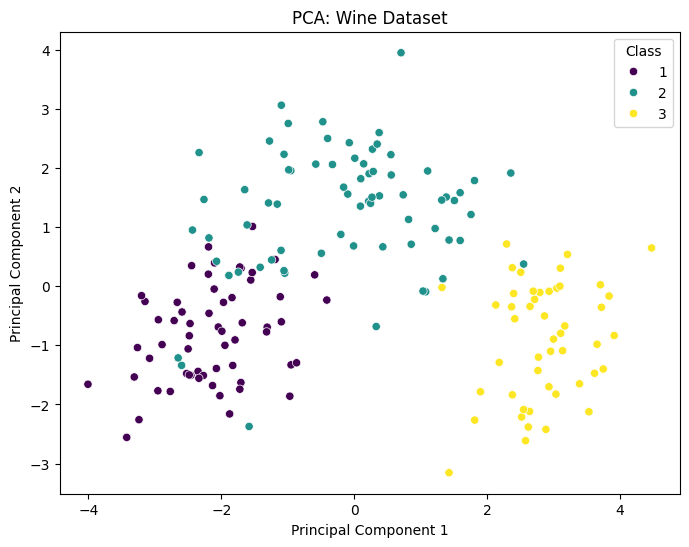

In [220]:
#Impute missing values
imputer = SimpleImputer(strategy='mean')  # Use mean value to impute missing values
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=wine_data['Class'], palette='viridis', legend='full')
plt.title('PCA: Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The plot shows some degree of separation between the three classes of wines, particularly between class 3 and the other two. This suggests that principal component analysis has been able to capture some of the underlying structure of the data that differentiates the different classes of wines. However, some overlap still exists, indicating that perfect separation based on these two principal components alone is not possible.



In [221]:
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio:
[0.38612318 0.16881157]


# Logistic Regression

In [222]:
# Separate features and target
X = wine_data.drop(['Class', 'Target'], axis=1)
y = wine_data['Class']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


# Train the logistic regression model
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)



LogisticRegression(max_iter=10000)

Logistic Regression Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


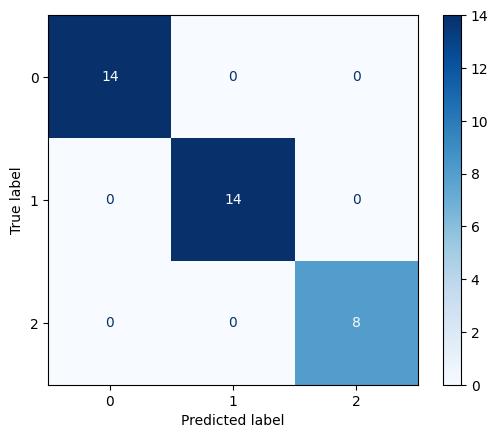

In [223]:
y_pred_lr = lr_model.predict(X_test)

print('Logistic Regression Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Classification Report:\n', classification_report(y_test, y_pred_lr))

# Compute confusion matrix for logistic regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix:\n', cm_lr)

# Display confusion matrix
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap='Blues')

The logistic regression model achieved perfect accuracy of 1.0 on the test set. It correctly classified all instances of all three classes, as evident from the confusion matrix.

This suggests that the logistic regression model was able to separate the classes very well based on the given features.

In [224]:
regression_model = LinearRegression()
regression_model

LinearRegression()

regression_model Coeffecient
[ 3.10142289e-02 -2.34294229e-01  4.91484217e-02  2.34565246e-04
  1.42160729e-01 -3.52191614e-01 -3.06614129e-01  3.31987630e-02
  5.82732937e-02 -1.35460517e-01 -2.94581587e-01 -8.05466153e-04]
regression_model Intercept
3.093393151608889


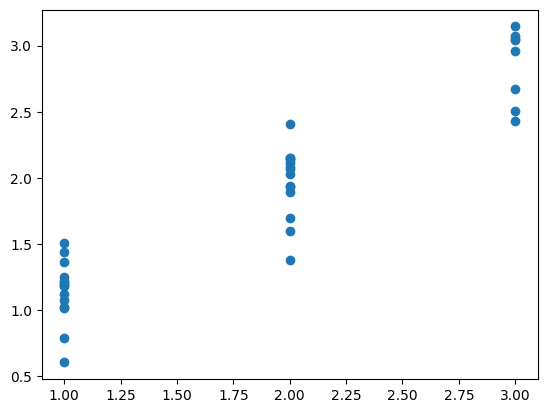

In [225]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions
y_pred = regression_model.predict(X_test)

# Plot actual vs predicted
plt.scatter(y_test, y_pred)

print("regression_model Coeffecient")
print(regression_model.coef_)
print("regression_model Intercept")
print(regression_model.intercept_)

The negative coefficients suggest that an increase in the corresponding feature would decrease the predicted class value, while positive coefficients indicate an increase in the predicted class value.

# DECISION TREE MODEL


Decision Tree Results:
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Confusion Matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]


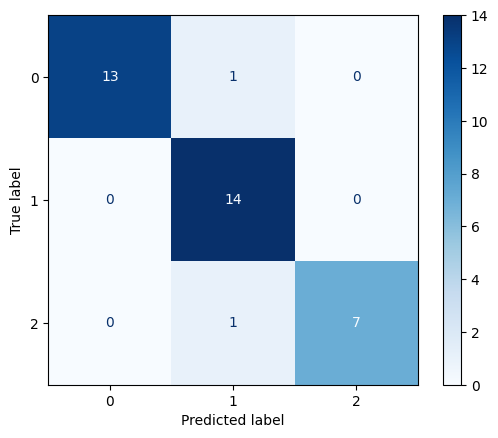

In [226]:
# Train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the decision tree model
y_pred_dt = dt_model.predict(X_test)
print('\nDecision Tree Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Classification Report:\n', classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
print('Confusion Matrix:\n', cm)

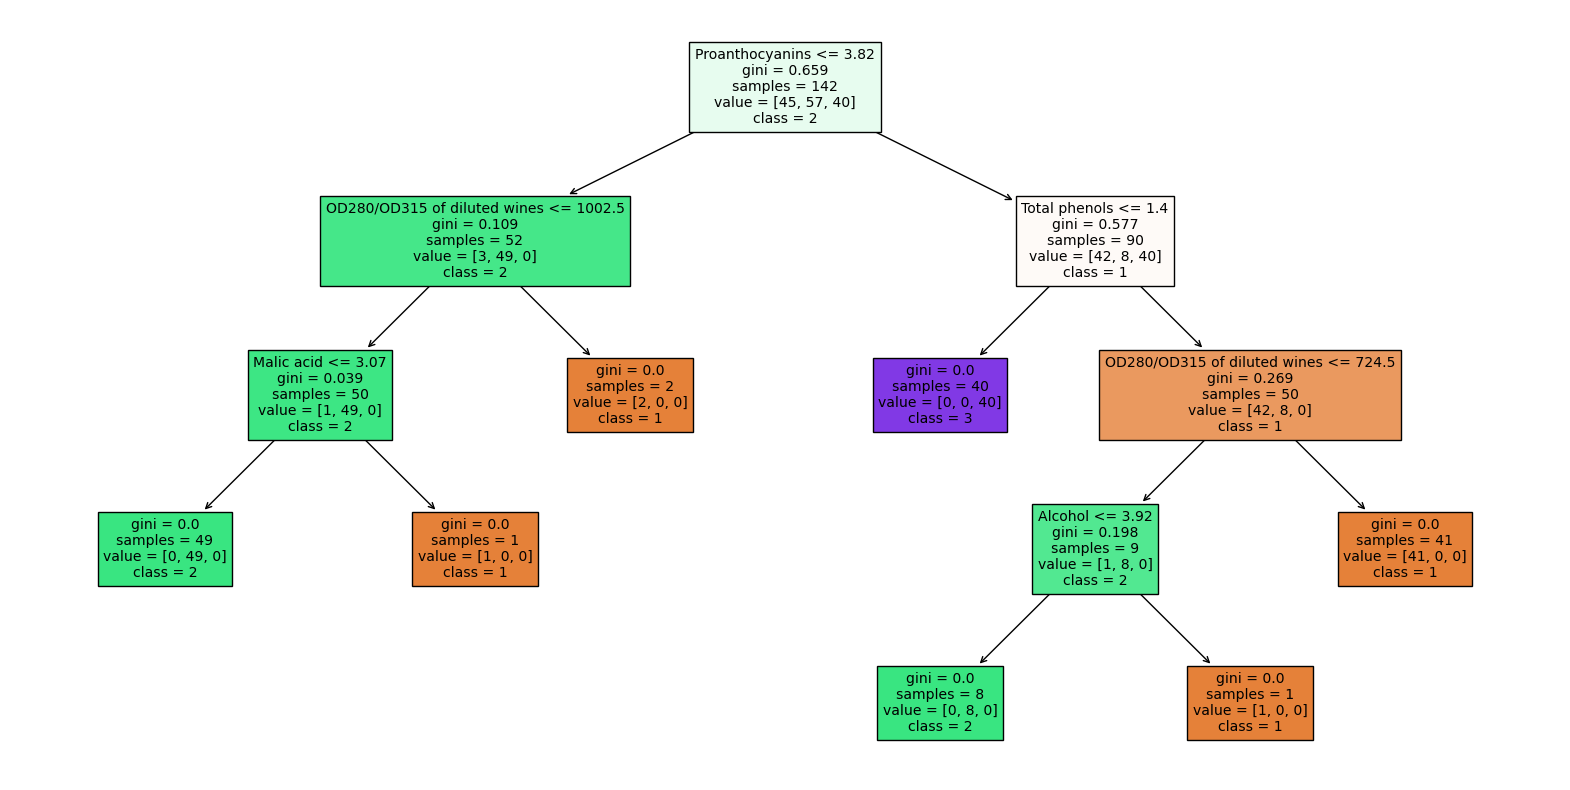

In [227]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['1', '2', '3'])
plt.show()


**K-Means clustering was used on the Wine dataset to group wines with similar chemical compositions and identify patterns within the data:**

In [228]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit K-Means clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
kmeans

# Make predictions using K-Means model
kmeans_labels = kmeans.predict(X_scaled)
kmeans_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

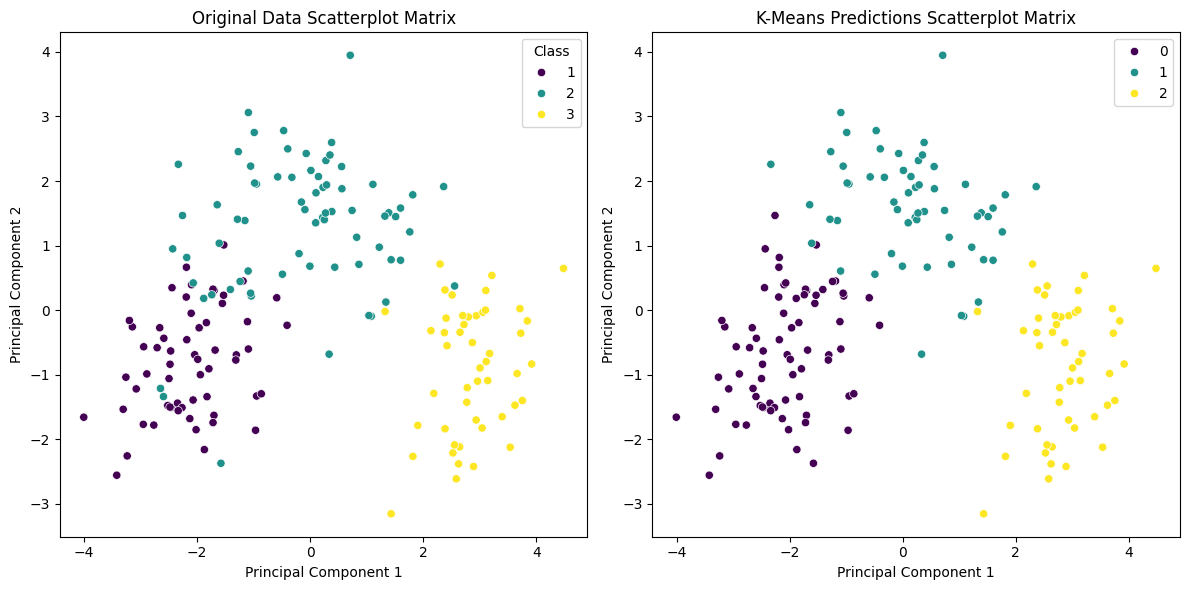

In [229]:
# Plot Scatterplot Matrices
plt.figure(figsize=(12, 6))
x=X_pca[:, 0]
y=X_pca[:, 1]

# Original Data Scatterplot Matrix
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=wine_data['Class'], palette='viridis')
plt.title('Original Data Scatterplot Matrix')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# K-Means Predictions Scatterplot Matrix
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Predictions Scatterplot Matrix')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

The scatter plots and matrices showed that K-Means could identify patterns in the data, with some separation between classes or clusters. However, there were overlaps between clusters, implying that complete separation based solely on the features might not be achievable.

(RESULTS DISCUSSED ALONG THE GRAPHS AND CODE)

# **FURTHER DISCUSSIONS:**

The logistic regression model achieved perfect accuracy on the test set, outperforming the decision tree model. However, it's important to consider the potential for overfitting.

Achieved an accuracy of 0.94 on the test set, slightly lower than logistic regression. The decision tree model could potentially generalize better to unseen data.

K-Means clustering is an unsupervised learning technique, which means it does not consider the true class labels during the clustering process. Results showed some separation between classes or clusters, but there were overlaps, implying that complete separation based solely on the features might not be achievable.


In our study of the Wine dataset, we aimed to distinguish between three wine classes based on their chemical compositions.

 Through detailed analysis, we uncovered significant relationships between various chemical properties and wine classes. For instance, we noticed that certain features tend to decrease with shifts in wine class, while others show a positive correlation.


To address this classification challenge, we employed various machine learning models like Logistic Regression, Decision Tree, and K-Means Clustering. While Logistic Regression achieved impressive accuracy, indicating potential overfitting, other models like Decision Tree offer promising generalization capabilities.

However, there's room for further improvement:
Adding additional data can add complex patterns and expand the range of analysis.



# **REFERENCES**

[1] Melissa M. Markoski, Juliano Garavaglia, Aline Oliveira, Jessica Olivaes, and Aline Marcadenti. 2016. Molecular Properties of Red Wine Compounds and Cardiometabolic Benefits. Nutr Metab Insights 9, (August 2016), 51–57. https://doi.org/10.4137/NMI.S32909

[2] ‘What does “structure” in wine mean?’ Club Oenologique. Retrieved April 26, 2024 from https://cluboenologique.com/story/what-does-structure-in-wine-mean/


[3] M. Forina Stefan Aeberhard. 1992. Wine. https://doi.org/10.24432/C5PC7J
